In [1]:
import pandas as pd
import numpy as np
import warnings

import seaborn as sns

warnings.filterwarnings('ignore')

data = pd.read_pickle('data/data_51.pkl')
data.head(2)

,ID,location,temp,precip,rel_humidity,wind_dir,wind_spd,atmos_press,target,max_temp,...,var_wind_spd,median_wind_spd,ptp_wind_spd,max_atmos_press,min_atmos_press,mean_atmos_press,std_atmos_press,var_atmos_press,median_atmos_press,ptp_atmos_press
0,ID_train_0,C,"[26.90909091, 27.20833333, 26.18333333, 24.7, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.5108181820000001, 0.535416667, 0.6145, 0.63...","[272.90275160000004, 104.565241, 167.1772247, ...","[0.800909091, 1.073333333, 1.5175, 1.4625, 0.5...","[87.77727273, 87.6525, 87.61416667, 87.6375, 8...",45.126304,27.208333,...,0.155268,0.666250,1.355000,87.871667,87.614167,87.752434,0.070374,0.004952,87.762083,0.257500
1,ID_train_1,D,"[22.53333333, 21.71666667, 20.83333333, 20.983...","[0.102, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.034, 0...","[0.744583333, 0.808083333, 0.911166667, 0.9163...","[281.6643101, 89.15629262, 81.96853891, 291.01...","[2.3775, 1.126666667, 0.700833333, 0.341666667...","[90.32, 90.3775, 90.44083333, 90.4725, 90.4541...",79.131702,33.616667,...,0.290736,0.744167,2.760833,90.725000,90.056667,90.429924,0.156000,0.024336,90.429167,0.668333


In [12]:

features=["temp","precip","rel_humidity","wind_dir","wind_spd","atmos_press"]
max_features = ["max_" + str(feat) for feat in features]
min_features = ["min_" + str(feat) for feat in features]
mean_features = ["mean_" + str(feat) for feat in features]
std_features = ["std_" + str(feat) for feat in features]
var_features = ["vat_" + str(feat) for feat in features]
median_features = ["median_" + str(feat) for feat in features]
ptp_features = ["ptp_" + str(feat) for feat in features]


In [13]:
mean_features

['mean_temp',
 'mean_precip',
 'mean_rel_humidity',
 'mean_wind_dir',
 'mean_wind_spd',
 'mean_atmos_press']

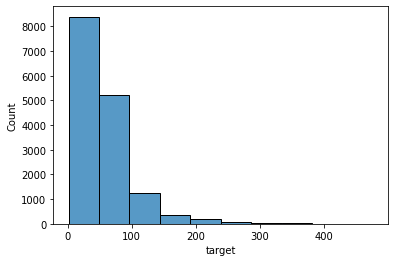

In [3]:
sns.histplot(data.target, bins=10)  # TODO bins passend zu der Klassifizierung

levels = {"Good:" }


In [ ]:
#sns.pairplot(data[mean_features])

#### EDA on precipitation

In [41]:
# EDA precipitation:
precip_stats = pd.concat([data.max_precip, 
                        data.min_precip, 
                        data.mean_precip, 
                        data.std_precip, 
                        data.var_precip, 
                        data.median_precip,  # all 0
                        data.ptp_precip],
                        axis=1)
precip_stats['r_std_precip'] = precip_stats['std_precip'] / precip_stats['mean_precip'] *100

In [51]:
precip_stats[['r_std_precip', 'std_precip','mean_precip'] ].isna().value_counts()

r_std_precip  std_precip  mean_precip
False         False       False          18497
True          False       False           2077
dtype: int64

In [42]:
precip_stats.median_precip.unique() #median values are all 0, why?

array([0.])

<AxesSubplot:xlabel='mean_precip', ylabel='Count'>

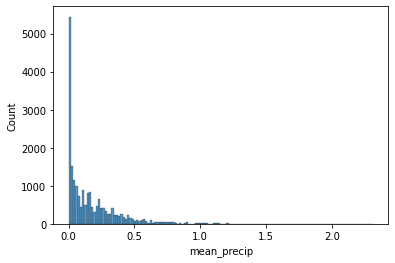

In [43]:
sns.histplot(precip_stats.mean_precip) # a lot of mean values == 0, when it doesn't rain

In [53]:
precip_stats.std_precip.describe()

count    20574.000000
mean         0.922876
std          1.020953
min          0.000000
25%          0.094493
50%          0.623129
75%          1.348988
max          5.636605
Name: std_precip, dtype: float64

In [54]:
precip_stats.mean_precip.describe()

count    20574.000000
mean         0.170715
std          0.213622
min          0.000000
25%          0.013769
50%          0.102752
75%          0.249897
max          2.310450
Name: mean_precip, dtype: float64

<AxesSubplot:xlabel='r_std_precip', ylabel='Count'>

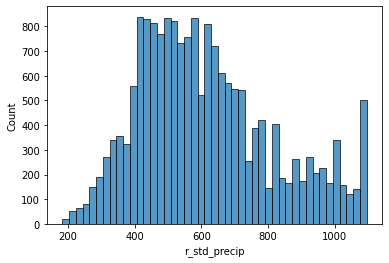

In [44]:
# relative Standard deviation of the precipitation
sns.histplot(precip_stats.r_std_precip)

The relative standard deviation is less than 15%, it should be ok

#### EDA on humidity 

In [45]:
# EDA precipitation:
rel_hum_stats = pd.concat([data.max_rel_humidity, 
                        data.min_rel_humidity, 
                        data.mean_rel_humidity, 
                        data.std_rel_humidity, 
                        data.var_rel_humidity, 
                        data.median_rel_humidity,  # all 0
                        data.ptp_rel_humidity],
                        axis=1)
rel_hum_stats['r_std_rel_humidity'] = rel_hum_stats['std_rel_humidity'] / rel_hum_stats['mean_rel_humidity'] * 100


<AxesSubplot:xlabel='mean_rel_humidity', ylabel='Count'>

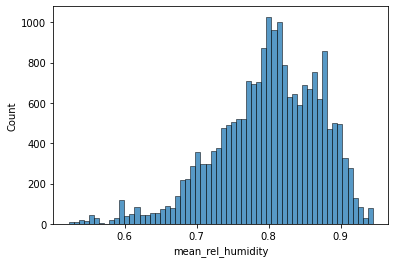

In [46]:
sns.histplot(rel_hum_stats.mean_rel_humidity) # a lot of mean values == 0, when it doesnt rain

<AxesSubplot:xlabel='r_std_rel_humidity', ylabel='Count'>

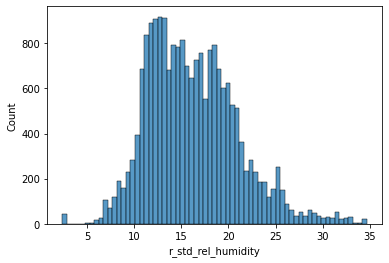

In [47]:
# relative Standard deviation of the precipitation
sns.histplot(rel_hum_stats.r_std_rel_humidity)

# Data cleaningin and feature engineering

In [ ]:
coffee_features.info()

In [ ]:
#for this exercise we will only deal with numeric variables

X = coffee_features.select_dtypes(['number'])

## Splitting data for testing 

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

In [ ]:
#dropping Quakers column and unnamed
#changing one of the altitude to log and droping the original
X_train["altitude_mean_log"] = np.log(X_train["altitude_mean_meters"])
X_train.drop(['altitude_mean_meters'], axis=1, inplace=True)
X_train.drop(['Quakers'], axis=1, inplace=True)
X_train.drop(['Unnamed: 0'], axis=1, inplace=True)

In [ ]:
X_train.info()

In [ ]:
altitude_low_meters_mean = X_train["altitude_low_meters"].mean()
altitude_high_meters_mean = X_train["altitude_high_meters"].mean()
altitude_mean_log_mean = X_train["altitude_mean_log"].mean()

In [ ]:
# fillna with mean.. 
X_train["altitude_low_meters"] = X_train["altitude_low_meters"].fillna(altitude_low_meters_mean)
X_train["altitude_high_meters"] = X_train["altitude_high_meters"].fillna(altitude_high_meters_mean)
X_train["altitude_mean_log"] = X_train["altitude_mean_log"].fillna(altitude_mean_log_mean)

In [ ]:
print(f"altitude low meters mean is {altitude_low_meters_mean}")
print(f"altitude_high_meters_mean is {altitude_high_meters_mean}")
print(f"altitude_mean_log_mean is {altitude_mean_log_mean}")

## Trainining the model

In [ ]:
## in order to exemplify how the predict will work.. we will save the y_train
X_test.to_csv("data/X_test.csv")
y_test.to_csv("data/y_test.csv")

In [ ]:
#training the model
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)

In [ ]:
from sklearn.metrics import mean_squared_error
y_train_pred = reg.predict(X_train)
mse = mean_squared_error(y_train, y_train_pred)
print(mse)

In [ ]:
#dropping Quakers column and unnamed
#changing one of the altitude to log and droping the original
X_test["altitude_mean_log"] = np.log(X_test["altitude_mean_meters"])
X_test.drop(['altitude_mean_meters'], axis=1, inplace=True)
X_test.drop(['Quakers'], axis=1, inplace=True)
X_test.drop(['Unnamed: 0'], axis=1, inplace=True)
# fillna with mean.. 
X_test["altitude_low_meters"] = X_test["altitude_low_meters"].fillna(altitude_low_meters_mean)
X_test["altitude_high_meters"] = X_test["altitude_high_meters"].fillna(altitude_high_meters_mean)
X_test["altitude_mean_log"] = X_test["altitude_mean_log"].fillna(altitude_mean_log_mean)

In [ ]:
y_test_pred = reg.predict(X_test)
mse = mean_squared_error(y_test, y_test_pred)
print(mse)